<a href="https://colab.research.google.com/github/neelpawarcmu/3D-BoundingBox/blob/master/Reinforcement%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Programming

In [ ]:
%cd '/content/drive/MyDrive/Neel/ML SCS/hw6/handout'
#python q_learning.py raw weight.out returns.out 4 200 0.05 0.99 0.01

/content/drive/MyDrive/Neel/ML SCS/hw6/handout


In [ ]:
"""algo
initialize Q(s,a) = 0 for ALL a
do forever:
  select action a by greedy policy epsilon -> select a from A, 
                                              1-epsilon -> select a = max(Q(s,a'))
  receive reward r
  observe state s'
  update table entry Q(s,a) = ((1-alpha)*Q(s,a)) + (alpha)*(r + gamma*max(Q(s',a'), a belongs to A))
"""

import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/Neel/ML SCS/hw6/handout/python') #@@@@@@@@@@@@@@@@@@@@@@@
from environment import MountainCar

class LinearModel:
  def __init__(self):
    pass

  def getq(self, state, weights, bias): 
    #returns vector if matrix provided, scalar if slice provided
    q = np.dot(state, weights) + bias
    return q

  def update(self, weights, bias, current_state, selected_action, reward, current_q, next_state, next_q):
    td_target = reward + gamma*next_q
    td_error = current_q - td_target
    gradient = current_state
    weights[:,selected_action] -= (learning_rate * td_error) * gradient
    bias -= (learning_rate * td_error)
    return weights, bias

      
class QLearningAgent:
  def __init__(self, env, mode, gamma, learning_rate, epsilon):
    self.actions = np.array([0,1,2]) #{'left':0,'stay':1,'right':2}
    self.mode = mode
    self.rewards = []
    self.Qtable = []
    
  def get_action(self, q_all):#, state: Dict[int, int]) -> int:
    """epsilon-greedy strategy.
    Given state, returns action.
    """
    probability = np.random.uniform(0,1)
    shuffled_actions = np.copy(self.actions)
    np.random.shuffle(shuffled_actions)
    if probability < epsilon:
      return shuffled_actions[0]
    else:
      return np.min(np.argmax(q_all))
    pass

  def train(self): #, episodes: int, max_iterations: int) -> List[float]:
    """training function.
    Train for ’episodes’ iterations, where at most ’max_iterations‘ iterations
    should be run for each episode. Returns a list of returns.
    """
    env.reset()
    weights = np.zeros((env.state_space, env.action_space))
    bias = 0
    for ep in range(episodes):
      total_reward = 0
      self.episode_length = 0
      s = env.reset()
      current_state = convertState(self.mode, s)
      at_flag = False   
      while self.episode_length < max_iterations and at_flag == False:
        #current_model = LinearModel()
        #next_model = LinearModel()
        qs_all = linmod.getq(current_state, weights, bias)
        selected_action = self.get_action(qs_all)
        current_q = qs_all[selected_action]
        self.Qtable.append(current_q)
        s, reward, at_flag = env.step(selected_action)
        next_state = convertState(self.mode, s)
        total_reward += reward
        qs_all_next = linmod.getq(next_state, weights, bias) 
        next_q = np.max(qs_all_next)
        weights, bias = linmod.update(weights, bias, current_state, selected_action, reward, current_q, next_state, next_q)

        current_state = next_state
        self.episode_length += 1
        if at_flag== True:
          print(ep, ': car reached goal at episode length = ', self.episode_length)
        if self.episode_length == max_iterations:
          print(ep, ': max episode length reached')
        #self.printer()

      #end of episode
      self.rewards.append(total_reward)

    #end of all episodes
    print(bias)
    writeToWeightsFile(weights_out, weights, bias)
    return self.rewards


  def printer(self):                    
    #print(selected_action)
    #print(x+' next_q:', next_q)
    #print(x+' td_target:', td_target)
    #print(x+' td_error:', td_error)
    #print('episode: ', ep, ' gradient:', gradient)
    #print(' before ', bias)
    #print(' after ', bias, '\n')
    pass


def writeToWeightsFile(f, weights, bias):
  f.write(str(bias)+'\n')
  for row in weights:
    for elem in row:
      f.write(str(elem)+'\n')
  f.close()

def writeToReturnsFile(f, returns):
  for i in range(len(returns)):
    f.write(str(returns[i])+'\n')
  f.close()


def convertState(mode, unprocessed_state):
  if mode == 'raw':
    state = np.array(list(unprocessed_state.values()))
  elif mode == 'tile':
    state = np.zeros(env.state_space)
    mask = np.array(list(unprocessed_state))
    state[mask] = 1
  return state


if __name__ == "__main__":
  mode = 'tile'  #sys.argv[1] #
  wf = 'weights.out'    #sys.argv[2] # 
  weights_out = open(wf, 'w')
  rf = 'returns.out' #sys.argv[3] #
  returns_out = open(rf, 'w')
  episodes = 400 #int(sys.argv[4])    #4
  max_iterations = 200 # int(sys.argv[5])   #
  epsilon = 0.2   #float(sys.argv[6])#
  gamma = 0.99  #0.999  #float(sys.argv[7])#
  learning_rate = 0.00005   #float(sys.argv[8])#
  linmod = LinearModel()
  env = MountainCar(mode=mode)   ##  , fixed=1 @@@@@@@@@@@@@@@@@@'''remove fixed later'''
  agent = QLearningAgent(env, mode=mode, gamma=gamma, epsilon=epsilon, learning_rate=learning_rate)
  returns_tile = agent.train()#episodes, max_iterations)
  writeToReturnsFile(returns_out, returns)
#print(np.size(initial_weights, 0), np.size(initial_weights, 1))
#print(returns_tile)



def empirical():
  """
  episodes = 400    #int(sys.argv[4])
  max_iterations = 200 #2000   #int(sys.argv[5])
  epsilon = 0.05 #0.05   #float(sys.argv[6])
  gamma = 0.99  #0.999  #float(sys.argv[7])
  learning_rate = 0.00005 # 0.001
  """

0 : max episode length reached
1 : max episode length reached
2 : max episode length reached
3 : max episode length reached
4 : max episode length reached
5 : max episode length reached
6 : max episode length reached
7 : max episode length reached
8 : max episode length reached
9 : max episode length reached
10 : max episode length reached
11 : max episode length reached
12 : max episode length reached
13 : max episode length reached
14 : max episode length reached
15 : max episode length reached
16 : max episode length reached
17 : max episode length reached
18 : max episode length reached
19 : max episode length reached
20 : max episode length reached
21 : max episode length reached
22 : max episode length reached
23 : max episode length reached
24 : max episode length reached
25 : max episode length reached
26 : max episode length reached
27 : max episode length reached
28 : max episode length reached
29 : max episode length reached
30 : max episode length reached
31 : max episode l

NameError: ignored

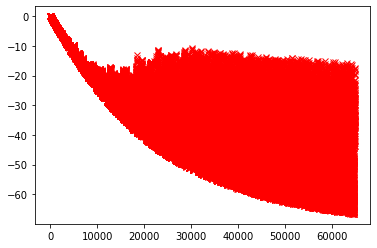

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(len(agent.Qtable))
#print(len(agent.Qtable))
plt.plot(x,agent.Qtable, 'rx')

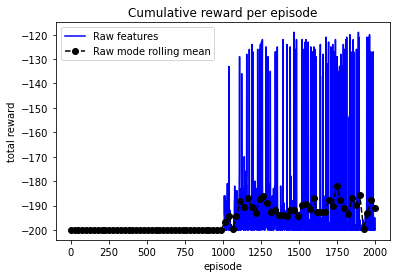

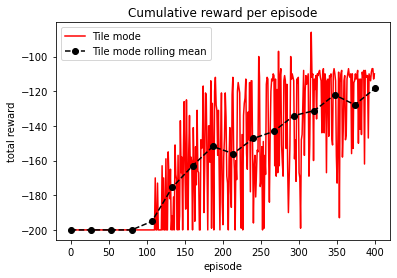

In [ ]:
import matplotlib.pyplot as plt

def rollingMean(ret):
  length = len(ret)
  steps = int(len(ret)/25) 
  #print(steps)
  x = np.linspace(0, length, steps)
  accum = []
  start = 0
  end = 25
  while end <= len(ret):
    y = np.average(ret[start:end])
    accum.append(y)
    start += 25
    end += 25
  return x, accum


x = np.arange(2000)
plt.plot(x, returns, 'b-' , label='Raw features')
x_mean, ret_mean = rollingMean(returns)
plt.plot(x_mean, ret_mean, 'k--', marker='o', label = 'Raw mode rolling mean')

plt.xlabel('episode')
plt.ylabel('total reward')
plt.title('Cumulative reward per episode')
plt.legend()
plt.show()



plt.figure()
x_tile = np.arange(400)
plt.plot(x_tile, returns_tile, 'r-' , label='Tile mode')
x_mean_tile, ret_mean_tile = rollingMean(returns_tile)
plt.plot(x_mean_tile, ret_mean_tile, 'k--', marker='o', label = 'Tile mode rolling mean')

plt.xlabel('episode')
plt.ylabel('total reward')
plt.title('Cumulative reward per episode')
plt.legend()
plt.show()





In [ ]:
trial = [1,2,3]
trial_shuff = trial[:]
(np.random.shuffle(trial_shuff))
print(trial)

[1, 2, 3]


In [ ]:
trial = {0:0.3344,1:2332.2}
dtrial = np.array(list(trial.values()))
dtrial 

trial2 = {1:1,2:1,10:1}
dtrial2 = np.zeros(max(trial2))
dtrial2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
dt = {3: 1, 9: 1, 10: 1, 1: 1, 2: 1, 6: 1}
x = list(dt)

y = (np.zeros(11))
y[x] = 1
y

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.])

In [ ]:
w = np.random.randn(2,3)
print(w)
for row in w:
  for elem in row:
    print(elem)

[[ 5.00042687e-01 -9.03411263e-04 -2.23011597e-01]
 [ 1.31280666e+00 -8.30942455e-01  1.54195528e+00]]
0.5000426867383939
-0.0009034112629133665
-0.22301159708413604
1.3128066605906221
-0.830942454925531
1.5419552773237097
